In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook

In [5]:
raw_data = np.genfromtxt('./foo.csv', delimiter=',', dtype=np.float32)

In [6]:
def preprocess():
    directory = './foo.csv'
    raw_data = np.genfromtxt(directory, delimiter=',', dtype=np.float32)
    num_peds = int(np.max(raw_data, axis=1)[1])
    frames = np.unique(raw_data[0,:]).astype(np.int32)
    ped_ids = np.zeros([len(frames), num_peds], dtype=np.int32)
    data = np.zeros([num_peds, len(frames), 2])
    data_val = np.zeros([num_peds, len(frames)])
    for frame_idx,frame in enumerate(frames):
        num_peds_in_frame = len(raw_data[1,raw_data[0,:]==frame])
        ped_ids[frame_idx, :num_peds_in_frame] = raw_data[1, raw_data[0, :] == frame]
        data[ped_ids[frame_idx, :num_peds_in_frame]-1, frame_idx, :] = raw_data[2:, raw_data[0,:]==frame].T
        data_val[ped_ids[frame_idx, :num_peds_in_frame]-1, frame_idx] = 1

    for ped in range(num_peds):
        first_non_zero = 0
        first_idx = 0
        for frame in range(len(frames)):
            if data_val[ped, frame] == 1 and first_non_zero == 0:
                first_non_zero = 1
                first_idx = frame
            if data_val[ped, frame] == 1 and first_non_zero == 1:
                data[ped, (first_idx + 1):frame, 0] = np.linspace(data[ped, first_idx, 0], data[ped, frame, 0],
                                                                        frame - first_idx + 1)[1:-1]
                data[ped, (first_idx + 1):frame, 1] = np.linspace(data[ped, first_idx, 1], data[ped, frame, 1],
                                                                        frame - first_idx + 1)[1:-1]
                data_val[ped, (first_idx + 1):frame] = 1
                first_idx = frame
    return data, data_val

In [33]:
def visualize(data, data_val):
    anim_running = True
    max_peds = data.shape[0]
    max_frames = data.shape[1]

    fig = plt.figure()
    plt.axis('equal')
    plt.grid()
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-15, 5)
    ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color="black")
    peds_line = []
    peds_dot = []
    color = np.random.rand(3, max_peds)
    for i in range(max_peds):
        temp = ax.plot([], [],'--', lw=2,label = str(i), c = color[:,i])
        peds_line.extend(temp)
        temp = ax.plot([], [],'p', lw=2, label=str(i), c=color[:,i])
        peds_dot.extend(temp)

    fig.subplots_adjust(top=0.8)

    def init():
        for ped_line in peds_line:
            ped_line.set_data([], [])
        for ped_dot in peds_dot:
            ped_dot.set_data([], [])
        return peds_line,peds_dot,

    def animate(i):
        print('frame:', i, 'from: ', max_frames)
        for ped_num, ped_line in enumerate(peds_line):
            if data_val[ped_num,i] == 0:
                ped_line.set_data([], [])
                peds_dot[ped_num].set_data([],[])
            else:
                (x,y) = ped_line.get_data()
                ped_line.set_data(np.hstack((x,data[ped_num,i,0])), np.hstack((y[:],data[ped_num,i,1])))
                peds_dot[ped_num].set_data(data[ped_num,i,0], data[ped_num,i,1])
        return peds_line, peds_dot

        # You can pause the animation by clicking on it.
    def onClick(event):
        nonlocal anim_running
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True
    fig.canvas.mpl_connect('button_press_event', onClick)
    anim = animation.FuncAnimation(fig, animate,
                                       init_func=init,
                                       frames=max_frames,
                                       interval=50)
    plt.show()

In [34]:
data, data_val = preprocess()

<IPython.core.display.Javascript object>


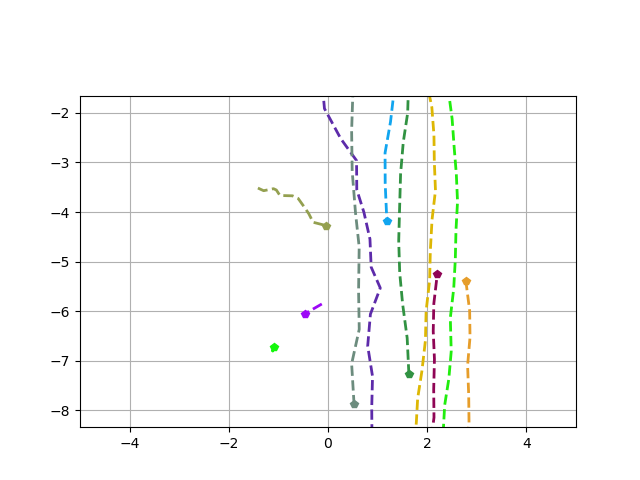

/home/hyf/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [35]:
from matplotlib import animation
visualize(data, data_val)